In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [2]:
## uni = file name
uni = "pid"

path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [3]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

pid_1_128_8_128_200_7_20250116
pid_1_64_8_64_200_7_20250116


0 100  /  MTL = 0.00137  /  MTL epoch = 099  /  0.00398  /  MVL epoch = 055  /  MVL_ACC = 99.884%  /  MAX_ACC = 99.895%  /  pid_1_128_8_128_200_7_20250116
1 6  /  MTL = 0.66723  /  MTL epoch = 003  /  0.66732  /  MVL epoch = 000  /  MVL_ACC = 61.315%  /  MAX_ACC = 61.315%  /  pid_1_64_8_64_200_7_20250116


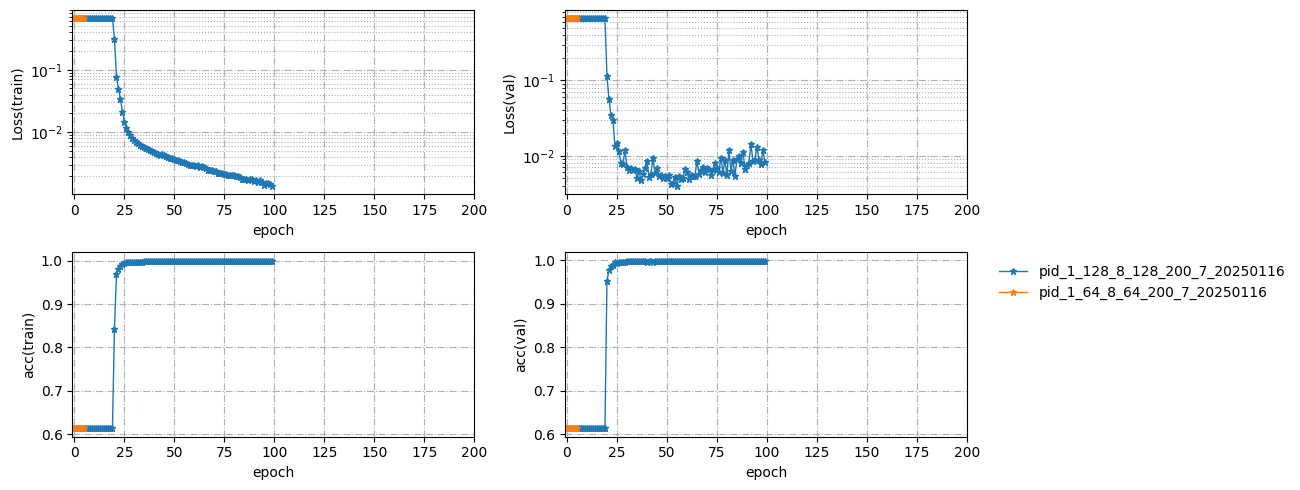

In [4]:

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(2, 2, 3, ylabel='acc(train)', xlabel='epoch')
ax4 = plt.subplot(2, 2, 4, ylabel='acc(val)', xlabel='epoch')

for ax in (ax1, ax2, ax3, ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([-1, 200])
# ax3.set_ylim(0.9,1.0)
# ax4.set_ylim(0.9,1.0)

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])
    label = train_list[i]

    # 각각의 축에 그래프를 그림
    l = ax1.plot(df['loss'], '*-', linewidth=1, label=label.split('/')[-2]) 
    ax2.plot(df['val_loss'], '*-', linewidth=1, label=label.split('/')[-2])
    ax3.plot(df['acc'], '*-', linewidth=1, label=label.split('/')[-2])
    ax4.plot(df['val_acc'], '*-', linewidth=1, label=label.split('/')[-2])

    # 콘솔에 최소 loss, 해당 epoch, val_acc 등 정보 출력
    print(
        i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.5f}",
        " / ",
        "MTL epoch = " + str("{:03}".format(np.where(df['loss'] == df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.5f}",
        " / ",
        "MVL epoch = " + str("{:03}".format(np.where(df['val_loss'] == df['val_loss'].min())[0][0])),
        " / ",
        "MVL_ACC = " + str("{:.3f}".format(100 * df['val_acc'][np.where(df['val_loss'] == df['val_loss'].min())[0][0]])) + "%",
        " / ",
        "MAX_ACC = " + str("{:.3f}".format(100 * df['val_acc'][np.where(df['val_acc'] == df['val_acc'].max())[0][0]])) + "%",
        " / ",
        label.split('/')[-2]
    )

    lines.append(l[0])
    labels.append(label)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()
plt.close()
